This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [52]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [53]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [54]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [55]:
train_labels[0]

5

In [56]:
train_images.shape # 60000个 28*28的训练图形

(60000, 28, 28)

In [57]:
len(train_labels)

60000

In [58]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [59]:
test_images.shape # 10000个 28*28的测试图形

(10000, 28, 28)

In [60]:
len(test_labels)

10000

In [61]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

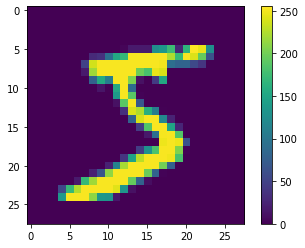

In [62]:
plt.figure()
plt.imshow(train_images[0]) #查看训练集[0]
plt.colorbar() #右侧尺标
plt.grid(False)
plt.show()

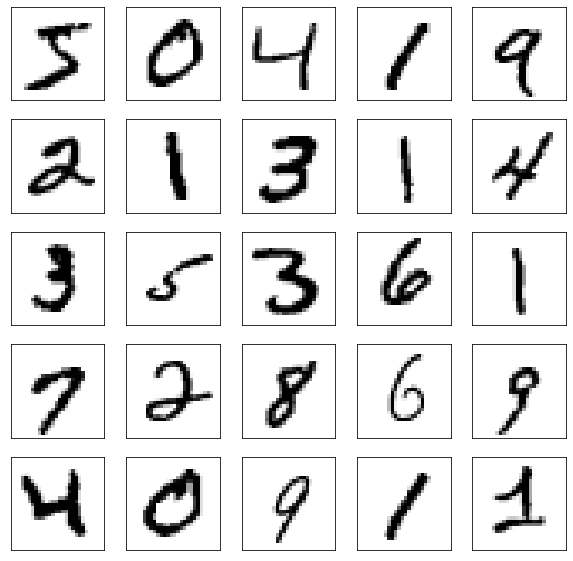

In [63]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) #黑白
plt.show()

**The network architecture** 网络架构

In [64]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"), #第一层 512个神经元
    layers.Dense(10, activation="softmax") #第二层 返回一个长度为10的logits数组（因为有10个数字），每个节点包含一个得分表明是10个数字中的哪一个
])

**The compilation step**

In [65]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#优化器：rmsprop
#损失函数：sparse_categorical_crossentropy
#指标：accuracy

**Preparing the image data**

In [66]:
print(train_images.dtype)
print(train_images.astype("float32").dtype)

uint8
float32


In [67]:
#将这些值缩小到0~1，然后送到神经网络里
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [68]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2609 - accuracy: 0.9233
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1055 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0693 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0505 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0380 - accuracy: 0.9887


**Using the model to make predictions**

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [69]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([3.1866315e-10, 1.1591750e-11, 1.6650753e-07, 2.2425329e-06,
       8.1811389e-14, 2.1961162e-09, 1.0227555e-15, 9.9999762e-01,
       4.1431805e-09, 4.1658453e-08], dtype=float32)

In [78]:
predictions[0].argmax() #返回给定NumPy 数组中最大值的索引

7

In [79]:
predictions[0][7]

0.9999976

In [80]:
test_labels[0]

7

**Evaluating the model on new data**

In [84]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}" )
print(f"test_loss: {test_loss}" )

313/313 [==============================] - 2s 5ms/step - loss: 0.0719 - accuracy: 0.9799
test_acc: 0.9799000024795532
test_loss: 0.07194691896438599


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [85]:
import numpy as np
x = np.array(12)
x

array(12)

In [86]:
x.ndim

0

### Vectors (rank-1 tensors)

In [87]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [88]:
x.ndim

1

### Matrices (rank-2 tensors)

In [89]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [90]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [91]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [92]:
train_images.ndim

3

In [93]:
train_images.shape

(60000, 28, 28)

In [94]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

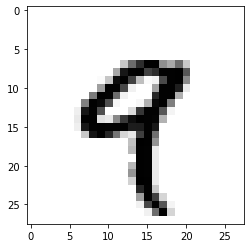

In [95]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [96]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [97]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [98]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [100]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [104]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [106]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### The notion of data batches

In [107]:
batch = train_images[:128]

In [108]:
batch = train_images[128:256]

In [109]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [119]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [120]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [134]:
a=np.random.rand(20,100)
a.shape

(20, 100)

In [135]:
x = np.random.random((20, 100))
x.shape

(20, 100)

In [136]:
#z 是x + y
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [138]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.59 s


### Broadcasting

In [145]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [146]:
y.shape

(10,)

In [147]:
#增加一个维度
y = np.expand_dims(y, axis=0)
y.shape

(1, 10)

In [151]:
#复制32份，并且按纵坐标拼接
Y = np.concatenate([y] * 32, axis=0)
Y.shape

(32, 10)

In [152]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [153]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [154]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [155]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [156]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [157]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [158]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [159]:
train_images = train_images.reshape((60000, 28 * 28))

In [160]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [161]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [162]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow 梯度带，处理自动微分

In [172]:
import tensorflow as tf
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

In [173]:
# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [181]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
#y=2x+3
#使用 GradientTape.gradient(target, sources) 计算某个目标（通常是损失）相对于某个源（通常是模型变量）的梯度
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x.numpy()

2.0

In [179]:
#从均匀分布中输出随机值
tf.random.uniform((2, 2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.62672865, 0.15266025],
       [0.6964468 , 0.37533844]], dtype=float32)>

In [180]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x.numpy()

array([[2., 2.],
       [2., 2.]], dtype=float32)

In [186]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
#matmul：矩阵相乘
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.4418075, 1.4418075],
        [1.5774704, 1.5774704]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [188]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [189]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [190]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [191]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2560 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1051 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0690 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0497 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0372 - accuracy: 0.9891


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [192]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [193]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [195]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu), #relu：小于0=0,大于0>0
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax) #每个数字（包括负数）归于0~1之间，并且他们的和为1
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary